# Цель проекта.  
Отследить влияние условий жизни учащихся на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import scipy as sp
df=pd.read_csv('stud_math.csv')

In [2]:
pd.set_option('display.max_columns', 30) # показывать больше строк.
pd.set_option('display.max_rows', 60) # показывать больше колонок.
display(df.head(10)) # выводим нашу таблицу.
df.info() # смотрим тип данных и наличие пропущенных значений.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Первичная обработка данных

Во всех колонках, кроме первых трех, видим пропуски.

У нас есть колонка "studytime, granular" значение которой мы не знаем. Посмотрим корреляцию с остальными колонками.

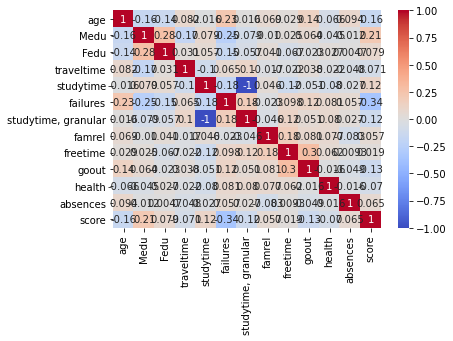

In [3]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Можно наблюдать обратную корреляцию c "studytime", значит одну из них можем удалить.

In [4]:
df.drop(['studytime, granular'], inplace = True, axis =1)

Пропуски в числовых данных, заменим на медиану:

In [5]:
def fill_nan_numb (col):
    return df[col].fillna(df[col].median(),inplace=True) # меняем числовые значения на медиану
df_numb = df.select_dtypes(include='number') # выбираем колонки с числовыми данными
for col in df_numb.columns.values:
    fill_nan_numb(col)

In [6]:
df.info() # проверяем заполнение

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Аналогично поступим с номинативными данными, но менять будем на моду:

In [7]:
def fill_nan_no_numb(col):
    return df[col].fillna(df[col].mode()[0],inplace=True) # меняем пустые значения на моду
df_no_numb = df.select_dtypes(include=['object']) # выбираем колонки с номинативными данными
for col in df_no_numb.columns.values:
    fill_nan_no_numb(col)

In [8]:
df.info() # проверяем заполнение

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

# Вывод.
В предоставленных данных имеются пропуски.

# Первичный анализ числовых переменных.
Рассмотрим все числовые показатели, их распределение и наличие данных выходящих за допустимые границы.

Возраст учащихся (от 15 до 22):

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

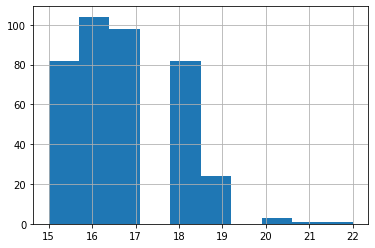

In [9]:
df.age.hist()
df.age.describe() 

Образование матери (от 0 до 4):

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

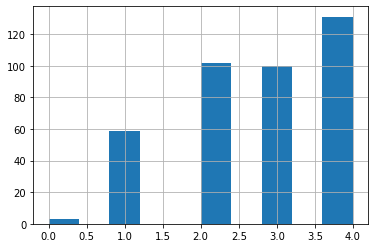

In [10]:
df.Medu.hist()
df.Medu.describe()

Образование отца (от 0 до 4):

count    395.000000
mean       2.577215
std        2.164782
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

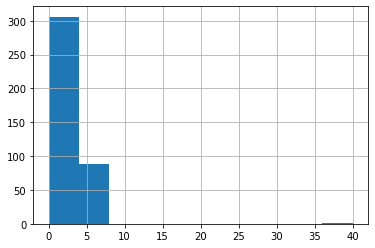

In [11]:
df.Fedu.hist()
df.Fedu.describe()

Минимальное значение соблюдено, а вот масимальное гораздо выше. Мы знаем, что максимальное значение в этом столбце 4, удалим все что больше него.

In [12]:
df = df.loc[df.Fedu <= 4]

Время в пути до школы (от 1 до 4):

count    394.000000
mean       1.403553
std        0.674575
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

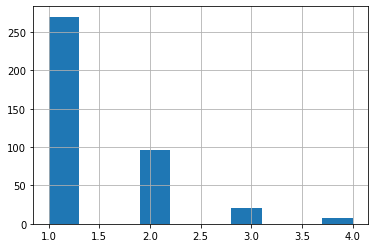

In [13]:
df.traveltime.hist()
df.traveltime.describe()

Время на учёбу помимо школы в неделю (от 1 до 4):

count    394.000000
mean       2.035533
std        0.834227
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

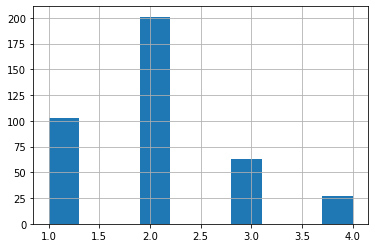

In [14]:
df.studytime.hist()
df.studytime.describe()

Количество внеучебных неудач (от 1 до 3):

count    394.000000
mean       0.319797
std        0.726989
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

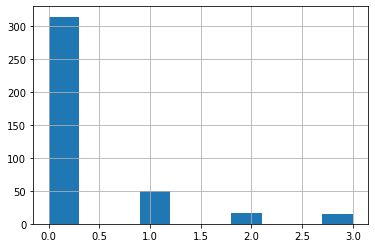

In [15]:
df.failures.hist()
df.failures.describe()

Семейные отношения (от 1 до 5):

count    394.000000
mean       3.939086
std        0.894624
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

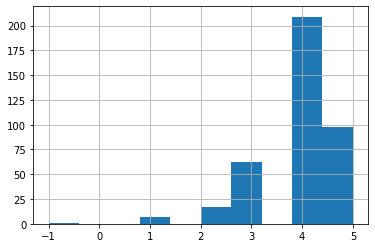

In [16]:
df.famrel.hist()
df.famrel.describe()

Тут видим, что есть данные меньше минимально допустимого, избавимся от них.

In [17]:
df = df.loc[df.famrel >= 1]

Свободное время после школы (от 1 до 5):

count    393.000000
mean       3.231552
std        0.979286
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

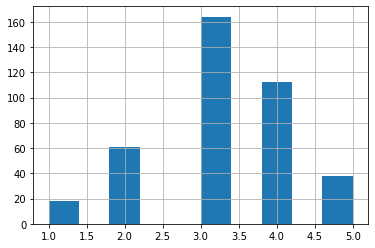

In [18]:
df.freetime.hist()
df.freetime.describe()

Время проведенное с друзьями (от 1 до 5):

count    393.000000
mean       3.109415
std        1.104600
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

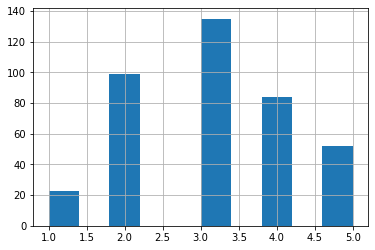

In [19]:
df.goout.hist()
df.goout.describe()

Текущее состояние здоровья (от 1 до 5):

count    393.000000
mean       3.544529
std        1.373465
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

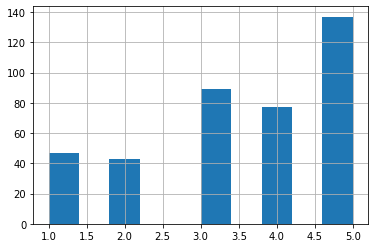

In [20]:
df.health.hist()
df.health.describe()

Количество пропущенных занятий:

count    393.000000
mean       7.170483
std       23.167732
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

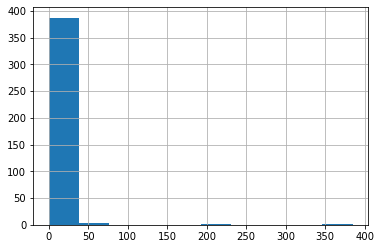

In [21]:
df.absences.hist()
df.absences.describe()

Есть не естественные показатели, в данном случае лучше удалить выбросы:

In [22]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
df = df.loc[df.absences.between(perc25-1.5*IQR, perc75+1.5*IQR)]

Баллы по математике (от 0 о 100):

count    376.000000
mean      52.287234
std       22.939513
min        0.000000
25%       43.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

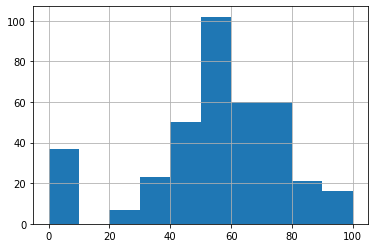

In [23]:
df.score.hist()
df.score.describe()

 Видим, что около 40 человек получили за экзамен 0 быллов, предположу, что это те, кто не пришли на него, так что отбросим их.

In [50]:
df = df.loc[df.score >= 1]

# Вывод.
В данных присутствуют выбросы и данные выходящие за допустимые границы.

# Первичный анализ номинативных переменных.
Оценим количество уникальных значений, и есть ли в них ошибки.  

Школа:

In [24]:
pd.DataFrame(df.school.value_counts())

,school
GP,331
MS,45


Видим, что все ученики из датафрейма учатся в двух школах.

Пол ученика ('F' - женский, 'M' - мужской):

In [25]:
pd.DataFrame(df.sex.value_counts())

,sex
F,193
M,183


Место проживание ('U' - в городе, 'R' - за городом):

In [26]:
pd.DataFrame(df.address.value_counts())

,address
U,295
R,81


Размер семьи ('LE3' - три или меньше человек , 'GT3' - больше трех):

In [27]:
pd.DataFrame(df.famsize.value_counts())

,famsize
GT3,272
LE3,104


Статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно):

In [28]:
pd.DataFrame(df.Pstatus.value_counts())

,Pstatus
T,344
A,32


Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

In [29]:
pd.DataFrame(df.Mjob.value_counts())

,Mjob
other,144
services,89
at_home,57
teacher,54
health,32


Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

In [30]:
pd.DataFrame(df.Fjob.value_counts())

,Fjob
other,224
services,94
teacher,27
at_home,16
health,15


Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое):

In [31]:
pd.DataFrame(df.reason.value_counts())

,reason
course,152
reputation,97
home,94
other,33


Опекун ('mother' - мать, 'father' - отец, 'other' - другое):

In [32]:
pd.DataFrame(df.guardian.value_counts())

,guardian
mother,267
father,84
other,25


Дополнительная образовательная поддержка (yes или no):

In [33]:
pd.DataFrame(df.schoolsup.value_counts())

,schoolsup
no,328
yes,48


Семейная образовательная поддержка (yes или no):

In [34]:
pd.DataFrame(df.famsup.value_counts())

,famsup
yes,243
no,133


Дополнительные платные занятия по математике (yes или no):

In [35]:
pd.DataFrame(df.paid.value_counts())

,paid
no,232
yes,144


Дополнительные внеучебные занятия (yes или no):

In [36]:
pd.DataFrame(df.activities.value_counts())

,activities
yes,203
no,173


Посещал детский сад (yes или no):

In [37]:
pd.DataFrame(df.nursery.value_counts())

,nursery
yes,301
no,75


Хочет получить высшее образование (yes или no):

In [38]:
pd.DataFrame(df.higher.value_counts())

,higher
yes,358
no,18


Наличие интернета дома (yes или no):

In [39]:
pd.DataFrame(df.internet.value_counts())

,internet
yes,321
no,55


Состоит в романтических отношениях (yes или no):

In [40]:
pd.DataFrame(df.romantic.value_counts())

,romantic
no,262
yes,114


# Вывод.
Все данные корректно внесены в таблицу

# Корреляционный анализ числовых переменных

In [41]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.182506,-0.169810,0.095131,-0.008483,0.221297,0.060337,0.043582,0.145308,-0.059196,0.151881,-0.158053
Medu,-0.182506,1.000000,0.598327,-0.170914,0.095979,-0.253135,-0.017390,0.041361,0.050665,-0.044971,0.068651,0.212353
Fedu,-0.169810,0.598327,1.000000,-0.132565,0.009131,-0.277640,-0.027580,-0.015852,0.039550,0.010564,-0.023612,0.118362
traveltime,0.095131,-0.170914,-0.132565,1.000000,-0.092025,0.063948,-0.029791,0.004231,0.050271,-0.045026,-0.032675,-0.056322
studytime,-0.008483,0.095979,0.009131,-0.092025,1.000000,-0.167298,0.020988,-0.132306,-0.040009,-0.077660,-0.070455,0.116735
failures,0.221297,-0.253135,-0.277640,0.063948,-0.167298,1.000000,0.003821,0.089126,0.104564,0.082250,0.071497,-0.328654
famrel,0.060337,-0.017390,-0.027580,-0.029791,0.020988,0.003821,1.000000,0.160327,0.066849,0.088114,-0.067188,0.060154
freetime,0.043582,0.041361,-0.015852,0.004231,-0.132306,0.089126,0.160327,1.000000,0.274073,0.057691,0.093735,0.038884
goout,0.145308,0.050665,0.039550,0.050271,-0.040009,0.104564,0.066849,0.274073,1.000000,-0.001010,0.111644,-0.109016
health,-0.059196,-0.044971,0.010564,-0.045026,-0.077660,0.082250,0.088114,0.057691,-0.001010,1.000000,-0.020970,-0.073363


Удаляем все колонки у которых корреляция меньше 0 с показателем 'score'

In [42]:
df.drop(['age', 'traveltime', 'failures', 'goout', 'health'], inplace = True, axis = 1)

# Корреляционный анализ номинативных переменных.  
Вначале сделаем его в ручную.

In [43]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

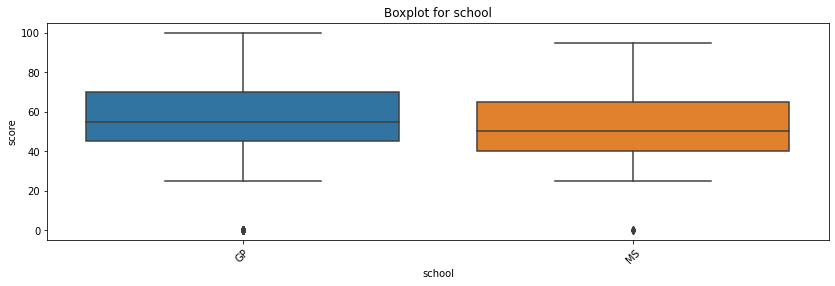

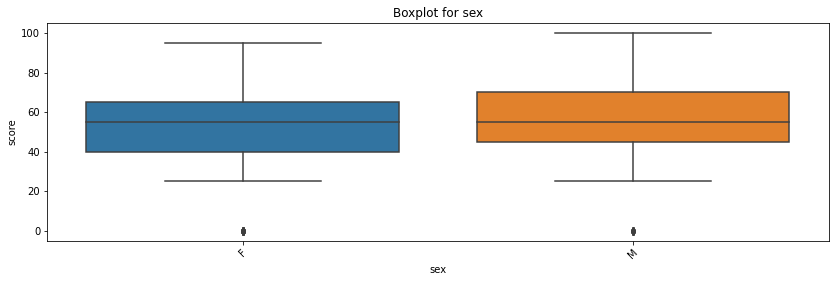

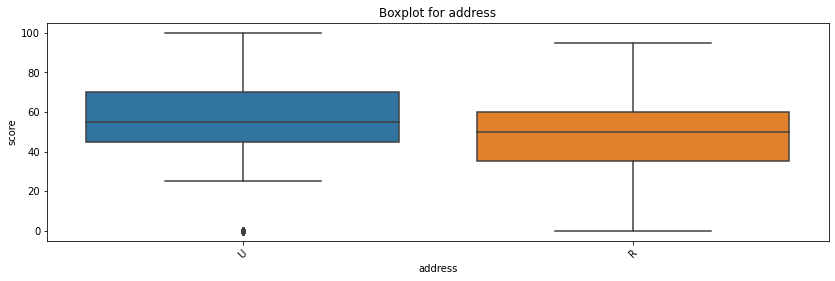

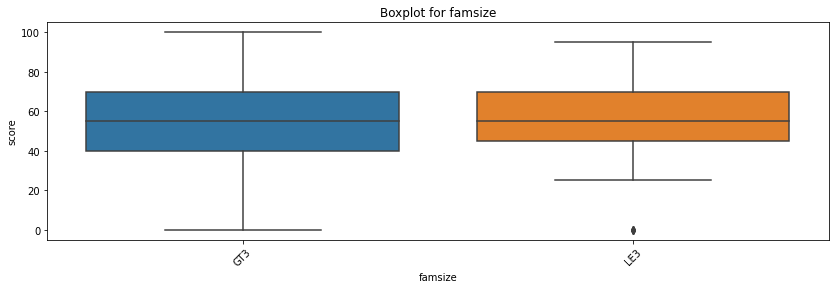

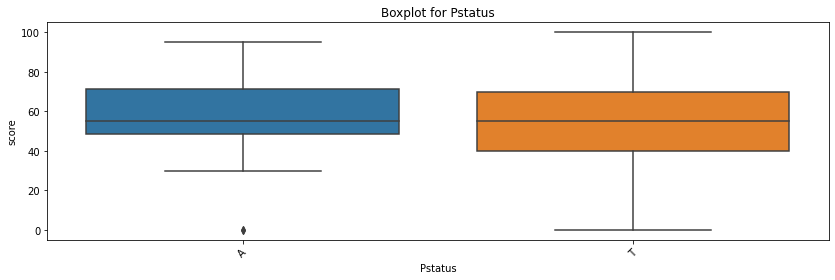

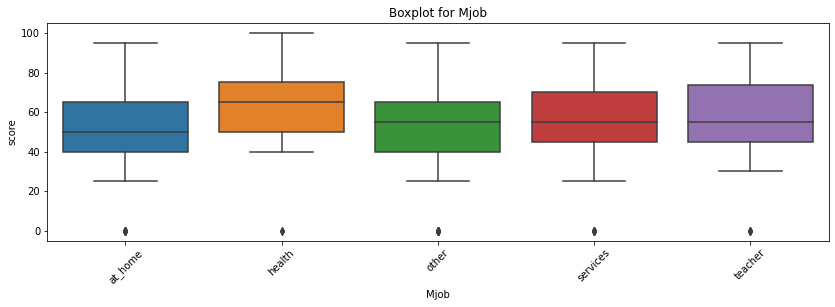

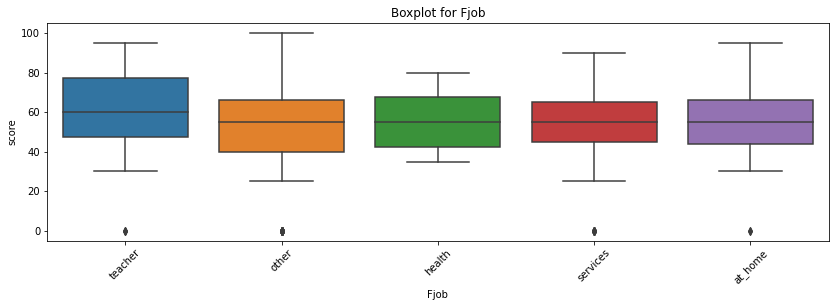

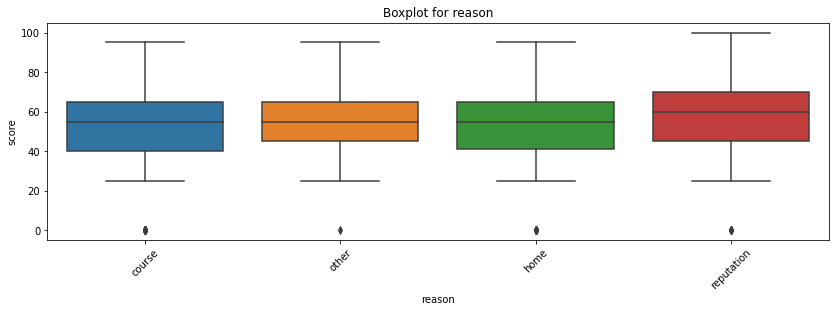

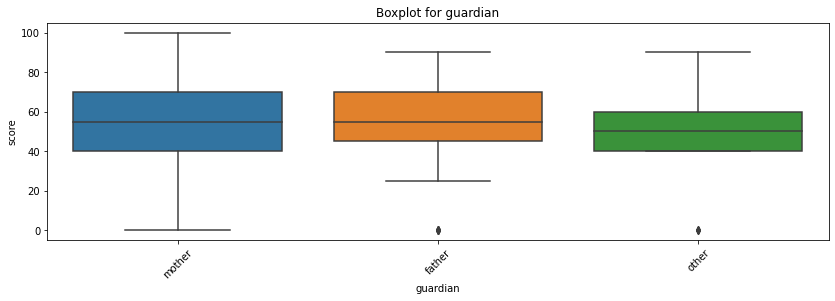

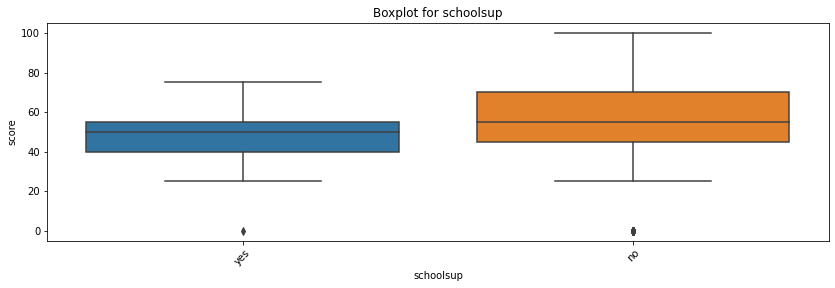

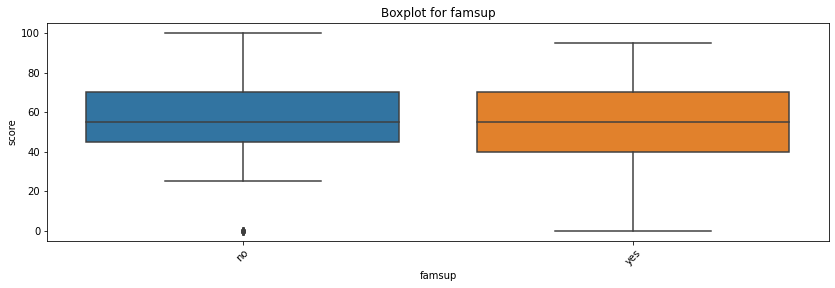

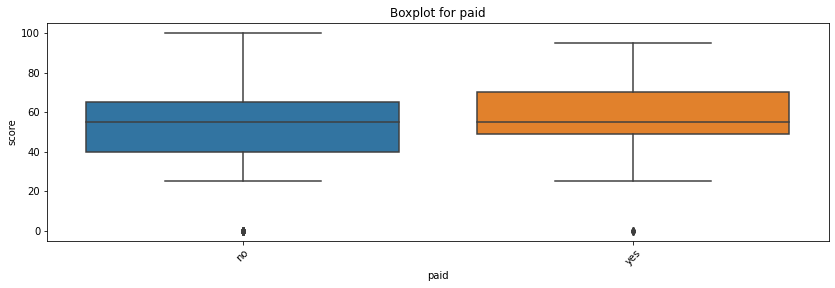

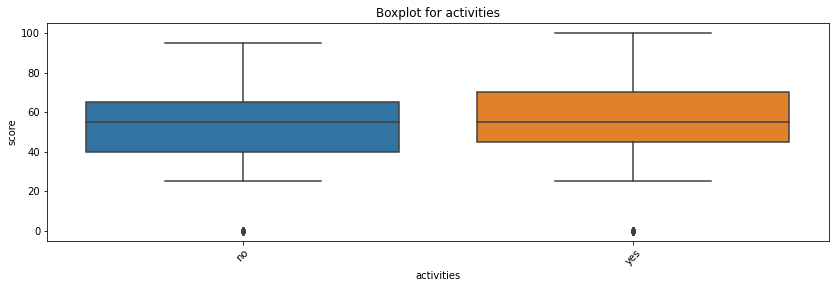

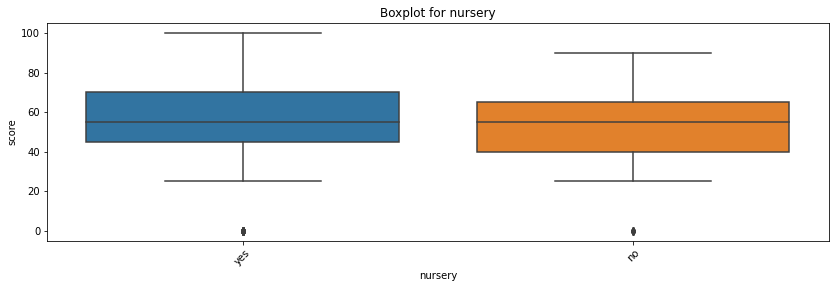

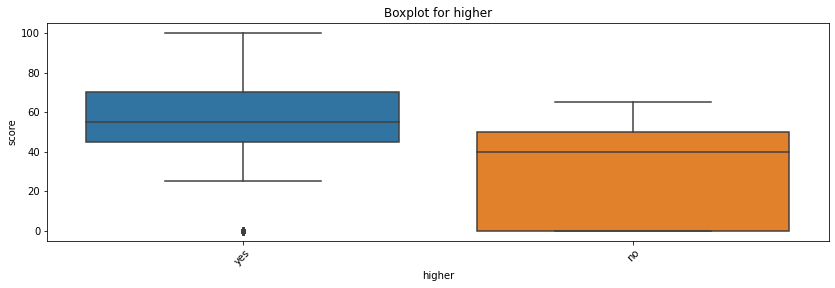

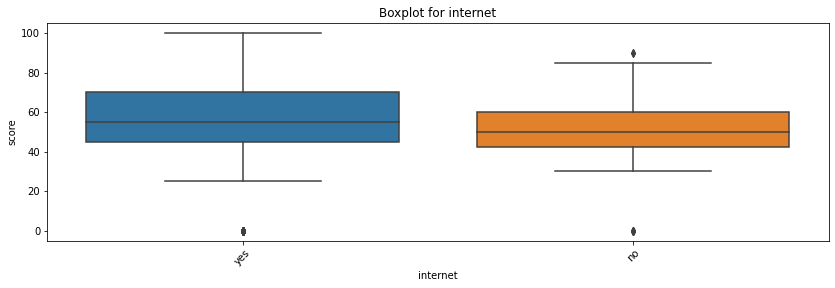

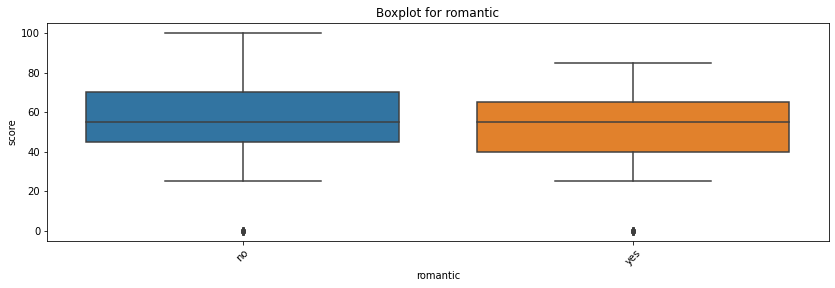

In [44]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Можем сделать вывод, что на "score" влияют:   
-school,  
-address,  
-schoolsup,   
-highter,  
и не влияют:  
-sex,  
-famsize,  
-Pstatus,  
-Mjob,  
-Fjob,  
-reason,  
-guardian,  
-famsup,  
-paid,  
-activities,  
-nursery,  
-internet, 
-romantic

Теперь сделаем его же, но с помощью теста Стьюдента:

In [45]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [46]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Результаты ощутимо отличаются, я буду придерживаться личных наблюдений. Удалим столбцы, которые не влияют на 'score'

In [47]:
df.drop(['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsup','paid', 'activities', 'nursery', 'internet', 'romantic'], inplace = True, axis = 1)

Посмотрим, на 10 учеников с худщими результатами за экзамен по математике:

In [56]:
df.nsmallest(10, 'score')

,school,address,Medu,Fedu,studytime,schoolsup,higher,famrel,freetime,absences,score
18,GP,U,3.0,2.0,1.0,no,yes,5.0,5.0,16.0,25.0
72,GP,R,1.0,1.0,2.0,yes,yes,4.0,3.0,2.0,25.0
79,GP,U,3.0,4.0,2.0,no,yes,2.0,4.0,12.0,25.0
100,GP,U,4.0,4.0,1.0,yes,yes,4.0,5.0,14.0,25.0
248,GP,R,3.0,3.0,2.0,no,yes,4.0,3.0,8.0,25.0
373,MS,R,1.0,2.0,1.0,no,yes,4.0,5.0,14.0,25.0
384,MS,R,4.0,2.0,1.0,no,yes,5.0,4.0,14.0,25.0
0,GP,U,4.0,4.0,2.0,yes,yes,4.0,3.0,6.0,30.0
1,GP,U,1.0,1.0,2.0,no,yes,5.0,3.0,4.0,30.0
7,GP,U,4.0,4.0,2.0,yes,yes,4.0,1.0,6.0,30.0


# Итоги работы.

В группе риска находятся ученики обоих школ, не смотря на то, что мы видим преобладание GP, стоит учесть, что их в датафрейме в пять раз больше чем учеников из MS. Проживающие за городом, хоть их в списке меньше, но стоит учитывать, что учеников из города в три раза больше, чем пригородних. Родители у них имеют примерно один уровень образования. Помимо школы, они не много тратят времени на учебу помимо школы. Без дополнительной образовательной поддержки, но с желанием получить высшее образование. У них хорошие отношения в семье, много свободного времен и они часто пропускают занятия.

# Вопросы.

Если не сложно ответьте пожалуйста в фитбэке:  
    1) Medu и Fedu имеют между собой корреляцию 0.6, это значит, что один из них можно удалить? Я вначале удалил, 
     но потом заметил, что разница со 'score' у них отличается на одну десятую. Но смотря на итог, мне кажется что оба эти параметра можно исключить.  
    2) Есть какой-то параметр корреляции по которому мы оставляем или удаляем количественые переменыные?  
    3) Почему получилась такая разница между моими выбранными номинативными параметрами и теми, что выбрал тест Стьюдента?  
    4) По моим боксплотам работу родителей действительно стоит исключить? То что у них выбивается по одной профессии, мне 
     мне показалось незначительным.  
    5) Как правильно формировать выводы, лучше писать после каждого этапа работы или в конце один (про качество данных и результат анализа)?